# Playing around
Trying to intuitively understand Noise Interferometry in a free medium

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from NI_simulation.modules import ni_sim
from scipy import interpolate
import sys
import pandas as pd
from scipy import signal
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

In [2]:
# create sources
sources = ni_sim.source_distribution2D().distant_uniform(5000, 30000, 4000, label='gauss')

In [3]:
env = ni_sim.environment(sources, time_length=600, frequencies = np.linspace(1,20,20))

(-31000.0, 31000.0)

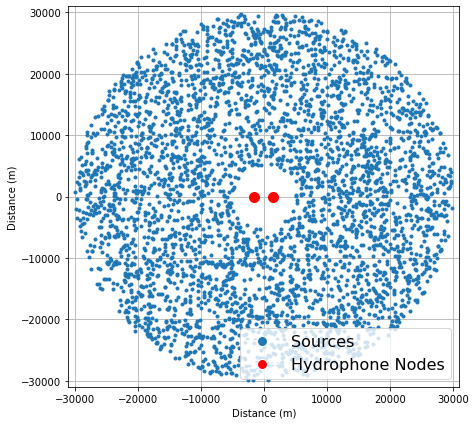

In [5]:
env.plot_env()
plt.xlim([-31000,31000])
plt.ylim([-31000,31000])

In [6]:
t, R = env.get_correlations(verbose=True, correlation_type='all', chunksize=5)

72


100%|██████████| 4000/4000 [00:24<00:00, 161.49it/s]


In [7]:
R = np.array(R)

Text(0.5, 0, 'delay [s]')

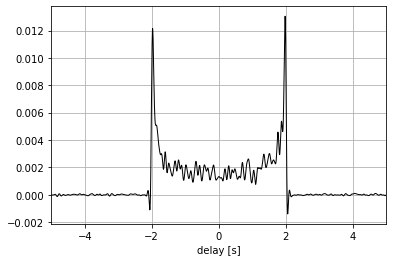

In [9]:
plt.plot(env.tau, np.sum(np.array(R), axis=0), linewidth=1, color='k')
plt.xlim([-5,5])
plt.grid()
plt.xlabel('delay [s]')

## Very quickly try the pearson coefficient thing

In [48]:
R_total = np.mean(R, axis=0)

In [49]:
coefs = []
for k in range(R.shape[0]):
    coefs.append(np.corrcoef(R_total, R[k,:])[0,1])

In [90]:
import matplotlib.tri as tri

x = np.ones(len(sources))*np.nan
y = np.ones(len(sources))*np.nan

for k in range(len(sources)):
    x[k] = sources.X[k][0]
    y[k] = sources.Y[k][0]
    

triang = tri.Triangulation(x, y)
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1), y[triang.triangles].mean(axis=1)) < 5000)

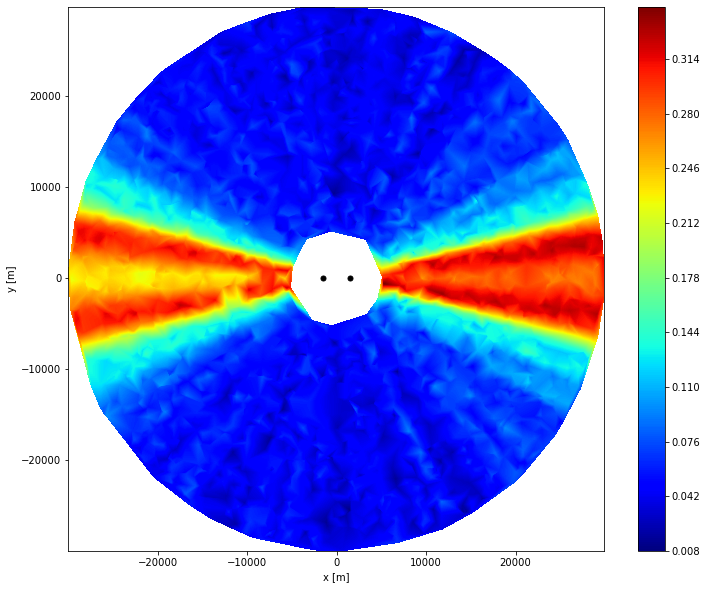

In [114]:
plt.figure(figsize=(12,10))
plt.tricontourf(triang, coefs, cmap='jet', levels=1000)

plt.plot(env.nodeA[0], env.nodeA[1], '.', color = 'k', markersize=10)
plt.plot(env.nodeB[0], env.nodeB[1], '.', color = 'k', markersize=10)
plt.xlabel('x [m]')
plt.ylabel('y [m]')

plt.colorbar()

plt.savefig('2D_sim_correlation.png', dpi=200)

## Simulate single point source as function of bearing

(-21000.0, 21000.0)

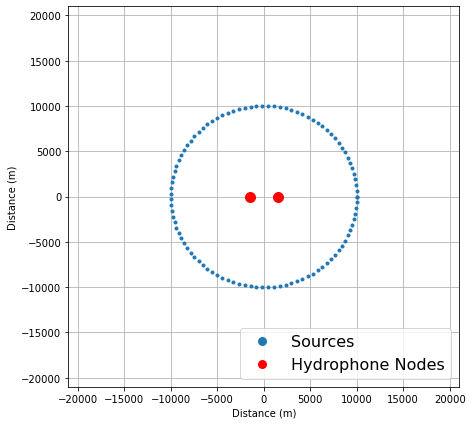

In [61]:
sources = ni_sim.source_distribution2D().uniform_circular(10000, (0,0), 100, label='gauss')
env = ni_sim.environment(sources, time_length=600)
env.plot_env()
plt.xlim([-21000,21000])
plt.ylim([-21000,21000])

In [68]:
t, R = env.get_correlations(correlation_type='all', verbose=True)

R = np.array(R)

72
100


100%|██████████| 100/100 [00:34<00:00,  2.90it/s]


Text(0, 0.5, 'bearing [degrees]')

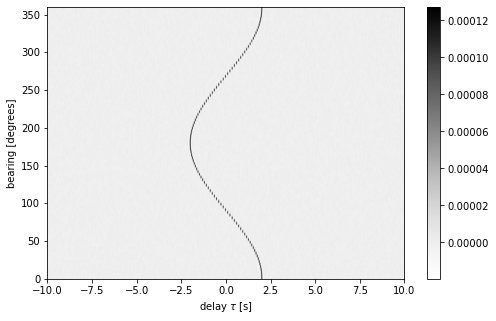

In [70]:
plt.figure(figsize=(8,5))
plt.imshow(R, aspect='auto', extent=[-600,600,0,360], cmap='Greys')
plt.xlim([-10,10])
plt.colorbar()
plt.xlabel('delay $\\tau$ [s]')
plt.ylabel('bearing [degrees]')